In [1]:
import importlib
import logging
import time

import numba
import numpy as np

import deduce_asymptotics
from deduce_asymptotics import deduce

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')

In [2]:
def insertion_sort(input_data: list) -> None:
    for i in range(1, len(input_data)):
        j = i
        while j > 0 and input_data[j - 1] > input_data[j]:
            input_data[j - 1], input_data[j] = input_data[j], input_data[j - 1]
            j -= 1

def selection_sort(input_data: list) -> None:
    for i in range(len(input_data) - 1):
        min_index = i
        for j in range(i + 1, len(input_data)):
            if input_data[j] < input_data[min_index]:
                min_index = j
        input_data[i], input_data[min_index] = input_data[min_index], input_data[i]

def log_search(input_data: list, key: int=0) -> int:
    i = len(input_data) // 2
    j = 0
    while i >= j:
        if input_data[i] == key:
            return i
        elif input_data[i] > key:
            j = i + 1
        else:
            i = i - 1
    return -1

2024-07-19 11:00:35,282 - Collecting data for insertion_sort...
2024-07-19 11:00:35,287 - Iteration   0. Input length: 32, Avg time: 0.0002022 ± 3.236e-05 seconds
2024-07-19 11:00:35,296 - Iteration   1. Input length: 64, Avg time: 0.001131 ± 0.000318 seconds
2024-07-19 11:00:35,318 - Iteration   2. Input length: 128, Avg time: 0.003572 ± 0.000681 seconds
2024-07-19 11:00:35,381 - Iteration   3. Input length: 256, Avg time: 0.01213 ± 0.001294 seconds
2024-07-19 11:00:35,648 - Iteration   4. Input length: 512, Avg time: 0.05314 ± 0.02683 seconds
2024-07-19 11:00:36,423 - Iteration   5. Input length: 1024, Avg time: 0.1548 ± 0.002744 seconds
2024-07-19 11:00:39,549 - Iteration   6. Input length: 2048, Avg time: 0.625 ± 0.006396 seconds
2024-07-19 11:00:52,758 - Iteration   7. Input length: 4096, Avg time: 2.641 ± 0.1841 seconds
2024-07-19 11:01:44,697 - Iteration   8. Input length: 8192, Avg time: 10.39 ± 0.3157 seconds
2024-07-19 11:01:44,697 - Starting the fit...
2024-07-19 11:01:44,69

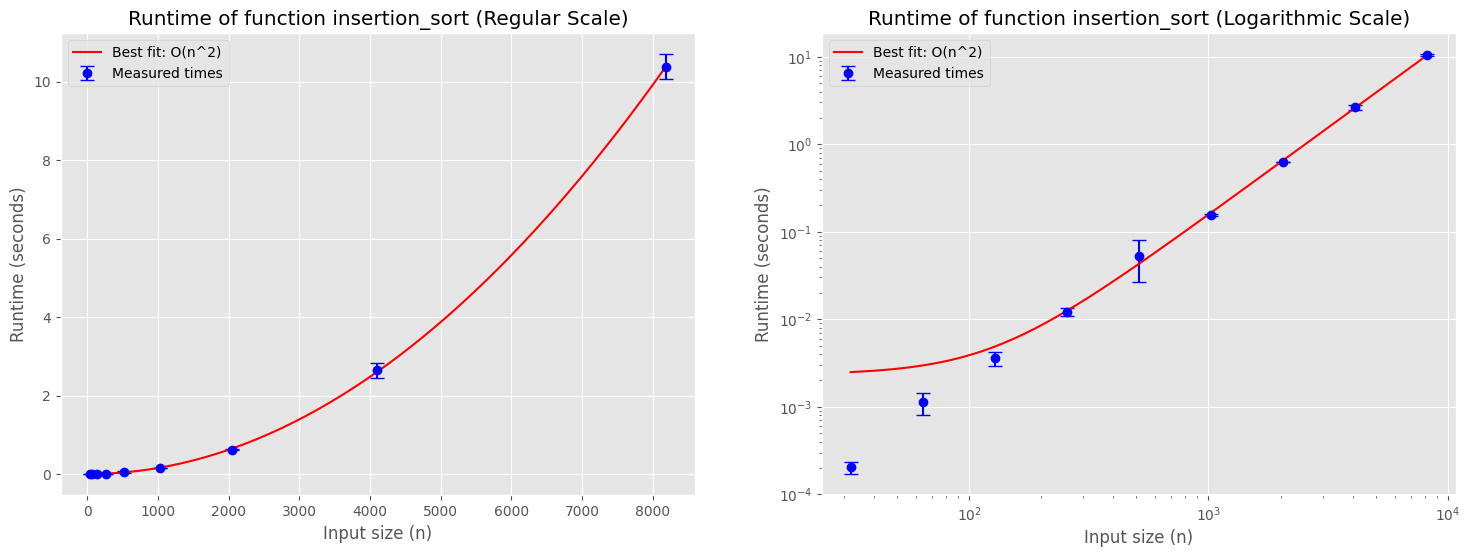

Time complexity of the function insertion_sort is O(n^2)


In [3]:
importlib.reload(deduce_asymptotics)

def build_input_sorted(n: int) -> list:
    x = np.random.randint(0, 1000, size=n)
    x = np.sort(x)
    return x

def build_input(n: int) -> list:
    x = np.random.randint(0, 1000, size=n)
    return x


# deduce(build_input_sorted, log_search, time_budget=60, num_samples=5)
deduce(build_input, insertion_sort, time_budget=60, num_samples=5)